In [1]:
pip install iisignature

     |████████████████████████████████| 1.3MB 2.8MB/s 
  Created wheel for iisignature: filename=iisignature-0.24-cp36-cp36m-linux_x86_64.whl size=2527498 sha256=3539cebd200366f2a846fcb9e78605646f0efb45971e6ff3a3eb8965f731ab08
  Stored in directory: /root/.cache/pip/wheels/57/33/98/2b03151aa0378df847a71a66ab6ed8f7594d310e11dcd60ed7
Successfully built iisignature


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import iisignature
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
## Save future files to your drive
## In this notebook control for multiple testing
import numpy as np
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
%cd "/content/drive/My Drive/DQN"

Mounted at /content/drive
/content/drive/My Drive/DQN


In [4]:
# bulid file to save model
try:
    os.mkdir("Model")
    print ("成功创建目录")
except:
    pass
sns.set()

成功创建目录


#Deep Q-learning Agent - zero transaction fee

In [5]:
# Generate traning and testing data based on the synthetic model
def generate_data(t,T): # There are two arguements as the input, 
                        # The first one t is the length of the training data, the second one T is the length of the testing data
  np.random.seed(0)     # Fix the random seed so that we can fix the traing data to be the same
  b = np.zeros((t), float) 
  p = np.zeros((t), float)  
  b[0] = 0 
  p[0] = 0
  for i in range(t-1):
    p[i+1] = p[i] + b[i] + 3 * np.random.randn()
    b[i+1] = 0.9 * b[i] + np.random.randn()
  R = np.max(p) - np.min(p) # Fix the value of R, and use this to generate the testing data
  z1 = np.exp(p/R)

  b1 = np.zeros((T-t), float) 
  p1 = np.zeros((T-t), float)  
  b1[0] = b[t-1]
  p1[0] = p[t-1]
  np.random.seed()
  for i in range(T-t-1):
    #np.random.seed()
    p1[i+1] = p1[i] + b1[i] + 3 * np.random.randn()
    b1[i+1] = 0.9 * b1[i] + np.random.randn()
  z2 = np.exp(p1/R)
  return z1, z2       # There are two outputs, z1 represents the training data, and z2 represents the testing data
df = generate_data(1000,10000)[0]
df = pd.Series(df)
print (df)


0      1.000000
1      1.009932
2      1.016244
3      1.031932
4      1.040085
         ...   
995    0.773323
996    0.777018
997    0.779748
998    0.777435
999    0.780834
Length: 1000, dtype: float64


Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
此时保存模型，此时最小cost为：0.19408144
此时保存模型，此时最小cost为：0.19407092
此时保存模型，此时最小cost为：0.17922658
此时保存模型，此时最小cost为：0.16591443
此时保存模型，此时最小cost为：0.13739209
此时保存模型，此时最小cost为：0.12956165
此时保存模型，此时最小cost为：0.12931925
此时保存模型，此时最小cost为：0.12743129
epoch:0, total_profit:-63.792
此时保存模型，此时最小cost为：0.12533526
此时保存模型，此时最小cost为：0.123199224
此时保存模型，此时最小cost为：0.11207237
此时保存模型，此时最小cost为：0.10793977
此时保存模型，此时最小cost为：0.09659387
此时保存模型，此时最小cost为：0.09346633
此时保存模型，此时最小cost为：0.09208643
epoch:1, total_profit:332.819
此时保存模型，此时最小cost为：0.091857105
此时保存模型，此时最小cost为：0.08290827
此时保存模型，此时最小cost为：0.08025524
此时保存模型，此时最小cost为：0.08013103
此时保存模型，此时最小cost为：0.077649124
epoch:2, total_profit:710.900
此时保存模型，此时最小cost为：0.07244992
此时保存模型，此时最小cost为：0.072375275
此时保存模型，此时最小cost为：0.068118595
此时保存模型，此时最小cost为：0.06537735
此时保存模型，此时最小cost为：0.062944576
此

No handles with labels found to put in legend.


epoch:49, total_profit:1373.781


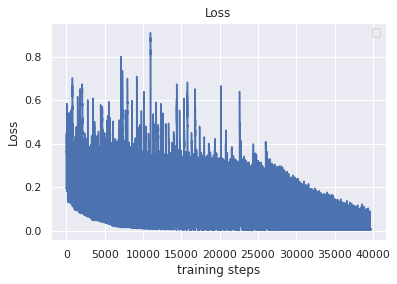

In [6]:
from stock_env_zero import stock
from RL_brain_new import DeepQNetwork
import iisignature


def game_step(observation, step=None, train=True): # inner loop of the algorithm
    
    # RL choose action based on observation DQN 根据观测值选择行为
    action = RL.choose_action(observation, train)

    # RL take action and get next observation and reward  环境根据行为给出下一个 state, reward, 是否终止
    observation_, reward, done = env.step(action)

    # DQN 存储记忆
    RL.store_transition(observation, action, reward, observation_) 
    # print("total profit:%.3f" % env.total_profit, end='\r')

    # 控制学习起始时间和频率 (先累积一些记忆再开始学习)
    if step and (step > 200) :#and (step % 100  == 0):
        RL.learn()

    # swap observation 将下一个 state_ 变为 下次循环的 state
    observation = observation_
    
    return observation, done
    

def run(max_round): # outside loop of the algorithm
    step = 0    # 用来控制什么时候学习
    for episode in range(max_round):
        # initial observation  初始化环境
        observation = env.reset()

        while True:
            
            observation, done = game_step(observation, step=step)   # 输入当前状态，调用game_step函数，选取动作，环境根据行为给出下一个 state, reward, 是否终止
            # print(observation)
            # break while loop when end of this episode 如果终止, 就跳出当前episode的循环
            if done:
                break
            step += 1  # 总步数
        
        print('epoch:%d, total_profit:%.3f' % (episode, env.total_profit))
        # BackTest(False)


def BackTest(env):
    observation = env.reset()
    step=0
    while True:
        observation, done = game_step(observation, train=False)
        # break while loop when end of this episode
        if done:
            break
    #print('total_profit:%.3f' % (env.total_profit))
    return env


if __name__ == "__main__":
    max_round = 50
    #file_path = '000065.SZ_NormalData.csv'
    #df = pd.read_csv(file_path)
    #df = df.sort_values('trade_date', ascending=True)
    df = generate_data(1000,10000)[0]
    df = pd.Series(df)
    trend = df.values.tolist() #选取收盘数据做测试
    env = stock(trend[0:1000])
    RL = DeepQNetwork(env.n_actions, env.n_features,
                      learning_rate=0.001,
                      reward_decay=0.99,
                      e_greedy=0.9,
                      replace_target_iter=200,
                      batch_size=200,
                      memory_size=4000,
                      # output_graph=True
                      )
    run(max_round)
    #env = stock(trend[0:1000])
    #test = df1.values.tolist()
    #env = stock(test[0:500])
    #env = BackTest(env, show_log=False)
    name='lr=0.001, gamma=0.99, bs=200, ms=4000'
    RL.plot_cost()
    #env.draw(name)
    


In [7]:
# Define the function to calculate sharpe ratio 
def sharpe_ratio(daily_return):
  dql_sharpe_ratio = []
  for i in range(len(daily_return)-1):
    dql_sharpe_ratio.append((daily_return[i+1]-daily_return[i])/daily_return[i])
  dql_sharpe_ratio=np.array(dql_sharpe_ratio)
  mean_return=dql_sharpe_ratio.mean()
  std_return=dql_sharpe_ratio.std()
  sharpe_ratio=mean_return/std_return*np.sqrt(252)
  return sharpe_ratio
#daily_return=env.get_info()[4] 
#sharpe_ratio(daily_return)

In [8]:
# Define the function to calculate maximum drwadown 
def MaxDrawdown(return_list):
    '''最大回撤率'''
    i = np.argmax((np.maximum.accumulate(return_list) - return_list) / np.maximum.accumulate(return_list))  # 结束位置
    if i == 0:
        return 0
    j = np.argmax(return_list[:i])  # 开始位置
    max_drawdown= (return_list[j] - return_list[i]) / (return_list[j])*100
    #plt.plot(return_list)
    #plt.plot([i, j], [return_list[i], return_list[j]], 'o', color="r", markersize=10)
    #plt.title('sharpe ratio %f,  maximum drawdown %f%%' %(sharpe_ratio(daily_return), max_drawdown ))
    #plt.legend()
    #plt.savefig('output-'+name+'-trade.png')
    #plt.show()
    return max_drawdown
#MaxDrawdown(daily_return)

1.1152123956030593
9.767665320306211


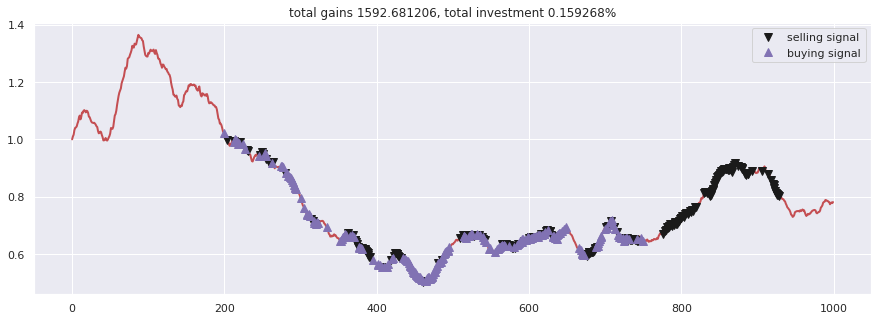

In [9]:
# Use the last model to do the test on the fixed traning set
df = generate_data(1000 ,10000)[0]
df = pd.Series(df)
test = df.values.tolist()
env = stock(test)
env = BackTest(env)
name ='lr=0.001, gamma=0.99, bs=200, ms=4000'
env.draw(name)
daily_return=env.get_info()[4] 
print (sharpe_ratio(daily_return))
print (MaxDrawdown(daily_return))

0.7509206003184572
34.53826799716768


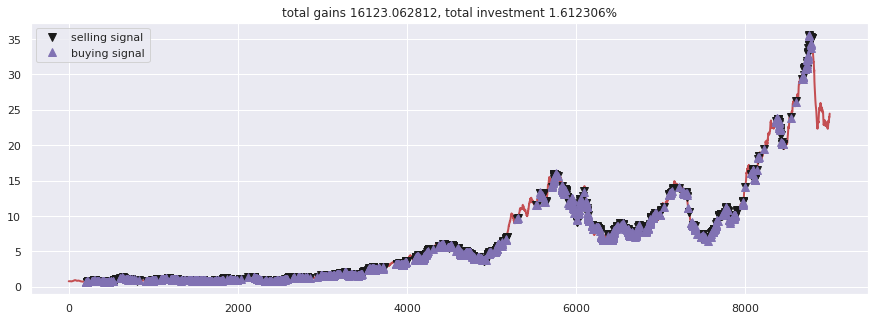

In [10]:
# Use the last model to do the test on one generated test data set
df = generate_data(1000 ,10000)[1]
df = pd.Series(df)
test = df.values.tolist()
env = stock(test)
env = BackTest(env)
name ='lr=0.001, gamma=0.99, bs=200, ms=4000'
env.draw(name)
daily_return=env.get_info()[4] 
print (sharpe_ratio(daily_return))
print (MaxDrawdown(daily_return))

In [ ]:
# Use the last model to do test on multiple samples based on the synthetic model 
# And calculate the test metrics
SP=[]
MD=[]
for i in range (100):
  df=pd.Series(generate_data(1000,10000)[1])
  test = df.values.tolist()
  env = stock(test[0:9000])
  env = BackTest(env)
  daily_return = env.get_info()[4]
  SP.append(sharpe_ratio(daily_return))
  MD.append(MaxDrawdown(daily_return))
SP=np.array(SP)
MD=np.array(MD)
#print(SP)
#print(MD)
mean_SP = SP.mean()
std_SP  = SP.std()
mean_MD = MD.mean()
std_MD  = MD.std()
print(mean_SP, std_SP)
print(mean_MD, std_MD)